In [1]:
import pandas as pd
import sqlite3

In [2]:
#The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017

In [3]:
sqlite3.connect('database_name')
conn = sqlite3.connect('database_name') 
c = conn.cursor()


In [4]:
df = pd.read_csv(r'C:\Users\lstev\Downloads\globalterrorismdb_0718dist.csv',encoding='latin-1',low_memory=False)

In [5]:
df.to_sql('database_name', conn, if_exists='append', index=False)

181691

In [6]:
sql_data = pd.read_sql('select * from database_name where country_txt="Greece"', conn)

In [7]:
#total  Terrorism for Greece

In [8]:
total_for_Greece= pd.read_sql('select count(*) as total from database_name where country_txt="Greece"', conn)


In [37]:
total_for_Greece_and_year= pd.read_sql('select imonth,iday ,summary, gname, iyear as total from database_name where country_txt="Greece" and iyear="2009"', conn)
df=pd.DataFrame(total_for_Greece_and_year)
pd.set_option('display.max_colwidth', None)


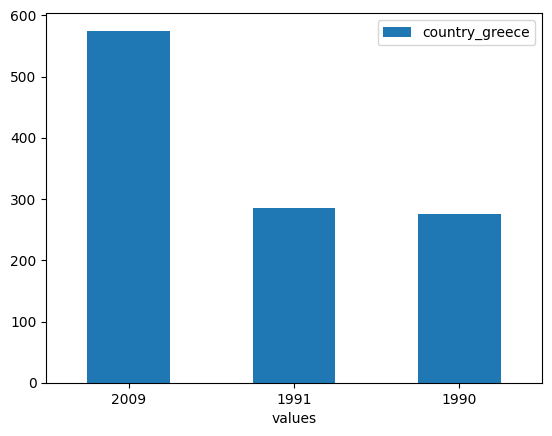

In [26]:
#total  Terrorism for Greece year
total_for_Greece_and_year= pd.read_sql('select count (*),iyear as total from database_name where country_txt="Greece" group by iyear order by count (*) desc limit 3', conn)
df = pd.DataFrame({'country_greece':total_for_Greece_and_year['count (*)'], 'values':total_for_Greece_and_year['total']})
ax = df.plot.bar(x='values', y='country_greece', rot=0)


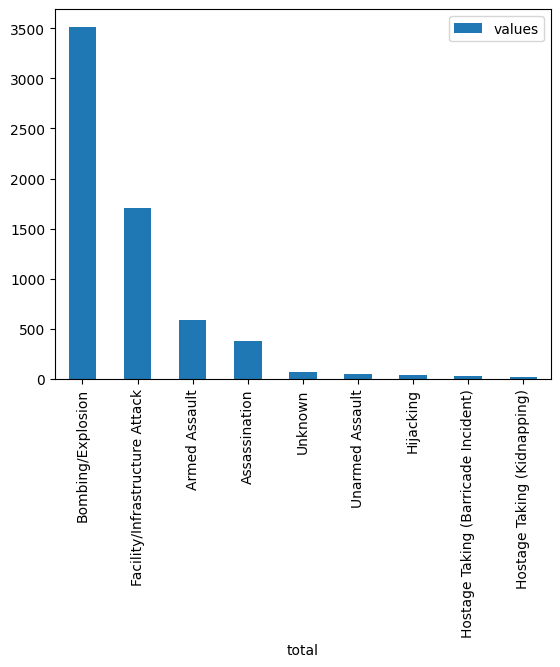

In [10]:
#total  Terrorism for Greece type
total_for_Greece_and_type= pd.read_sql('select attacktype1_txt ,count(*) as total from database_name where country_txt="Greece"  group by attacktype1_txt order by total desc', conn)
total_for_Greece_and_type
df = pd.DataFrame({'total':total_for_Greece_and_type['attacktype1_txt'], 'values':total_for_Greece_and_type['total']})
ax = df.plot.bar(x='total', y='values')


In [11]:
#total Terrorism for world 
total_for_world= pd.read_sql('select count (*) total from database_name where country_txt is not null',conn)
total_for_world

,total
0,908455


In [12]:
total_for_world_and_country=pd.read_sql('select count (*) as total,country_txt as country from database_name group by country order by count (*) desc limit 5', conn)
total_for_world_and_country['total']

df = pd.DataFrame({'country':total_for_world_and_country['total'], 'values':total_for_world_and_country['country']})

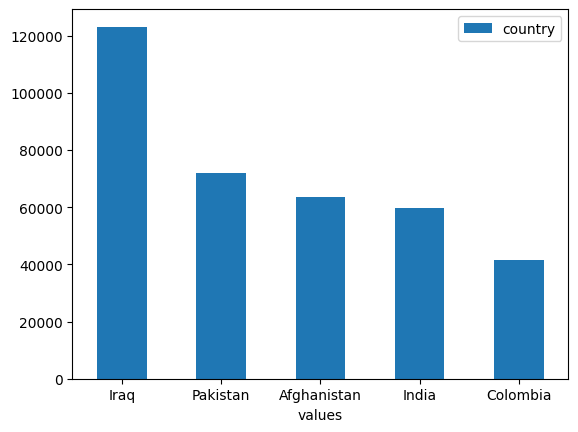

In [13]:
ax = df.plot.bar(x='values', y='country', rot=0)
#plot bar with 5 most terrorist attacks


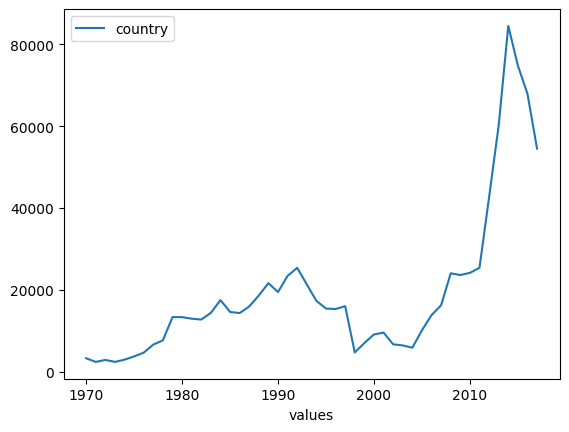

In [18]:
#plot line  over the years
total_for_world_years= pd.read_sql('select count (*),iyear as total from database_name group by iyear order by total', conn)
df = pd.DataFrame({'country':total_for_world_years['count (*)'], 'values':total_for_world_years['total']})
ax = df.plot.line(x='values', y='country')


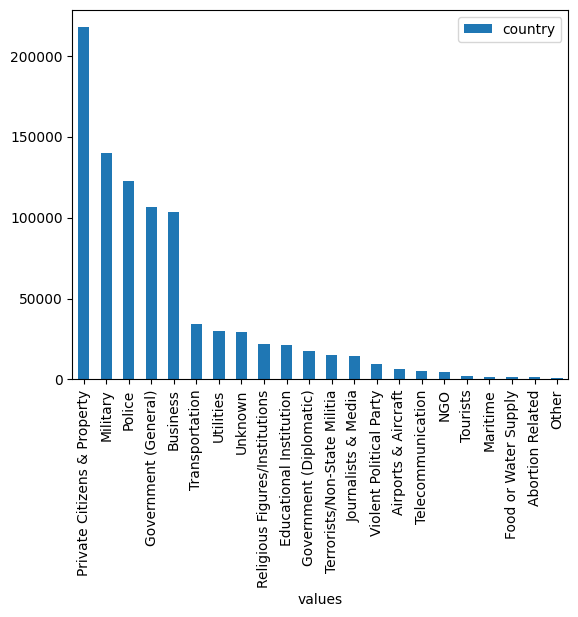

In [15]:
#targer types all over the world


total_target_type= pd.read_sql('select count (*) as sum,targtype1_txt from database_name group by targtype1_txt order by sum  desc', conn)
df = pd.DataFrame({'country':total_target_type['sum'], 'values':total_target_type['targtype1_txt']})
ax = df.plot.bar(x='values', y='country')

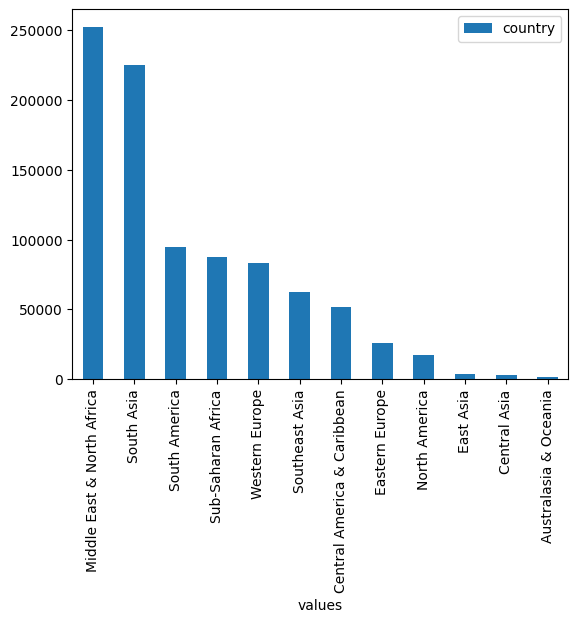

In [16]:
#region and total
total_target_per_region= pd.read_sql('select count (*) as sum,region_txt from database_name group by region_txt order by sum  desc', conn)
df = pd.DataFrame({'country':total_target_per_region['sum'], 'values':total_target_per_region['region_txt']})
ax = df.plot.bar(x='values', y='country')


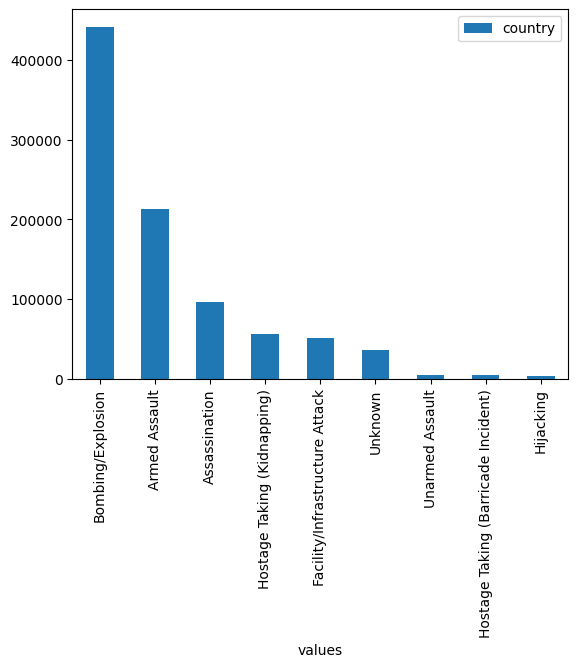

In [39]:
total_target_per_type= pd.read_sql('select count (*) as sum,attacktype1_txt from database_name group by attacktype1_txt order by sum  desc', conn)
df = pd.DataFrame({'country':total_target_per_type['sum'], 'values':total_target_per_type['attacktype1_txt']})
ax = df.plot.bar(x='values', y='country')